In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os #for operation on single file
import random #for generating random numbers
import shutil # for operation on collection of files
import numpy as np
from shutil import copyfile
from PIL import Image #to import the images
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
from keras.utils.np_utils import to_categorical  #for coverting into one hot encoding
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
#from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for augemtation of images like left rotate, right rotate

In [4]:
train_dir = '/content/drive/MyDrive/ocular/train'
test_dir = '/content/drive/MyDrive/ocular/test'

In [5]:
batch_size =128
img_height, img_width = 224,224

In [6]:
input_shape = (img_height, img_width, 3) #3 is for rgb images. if image woubld be black and white it would be 1

In [7]:
random_seed = np.random.seed(1142)  #to generate random number

train_datagen = ImageDataGenerator(
    rescale =1. /225,
    validation_split = 0.20,  #validation dataset 20% of data
    zoom_range = 0.2,
    shear_range = 0.2,
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (img_height, img_width),
    batch_size = batch_size,
    seed = random_seed,
    shuffle= False,
    subset ='training',
    class_mode = 'categorical'
)

Found 877 images belonging to 3 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (img_height, img_width),
    batch_size = batch_size,
    seed = random_seed,
    shuffle= False,
    subset ='validation',
    class_mode = 'categorical'
)

Found 218 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1. /255 )
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size= (img_height, img_width),
    batch_size = batch_size,
    seed = random_seed,
    shuffle= False,
    class_mode = 'categorical'
)

Found 274 images belonging to 3 classes.


In [11]:
nb_train_samples =len(train_generator.filenames) #number of train samples
nb_validation_samples =len(validation_generator.filenames)
nb_test_samples =len(test_generator.filenames)

In [12]:
num_classes = len(train_generator.class_indices)

In [13]:
print("nb_train_samples:",nb_train_samples)
print("nb_validation_samples:",nb_validation_samples)
print("nb_test_samples:",nb_test_samples)



nb_train_samples: 877
nb_validation_samples: 218
nb_test_samples: 274


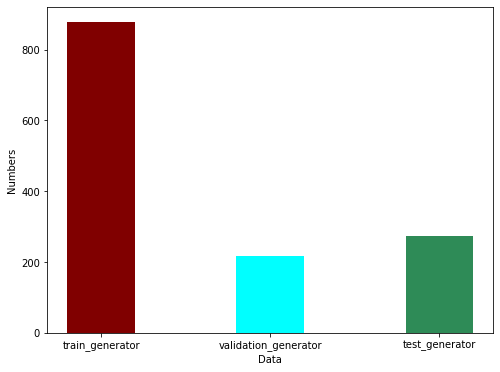

In [14]:
plt.figure(figsize=(8,6))
plt.bar(["train_generator", "validation_generator", "test_generator"], [nb_train_samples, nb_validation_samples, nb_test_samples], color=["maroon", "cyan","seagreen"], width=0.4 )
plt.xlabel('Data')
plt.ylabel('Numbers')
plt.show()

In [15]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), padding='Same', activation ='relu', input_shape=(img_height, img_width, 3) ))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size = (3,3), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

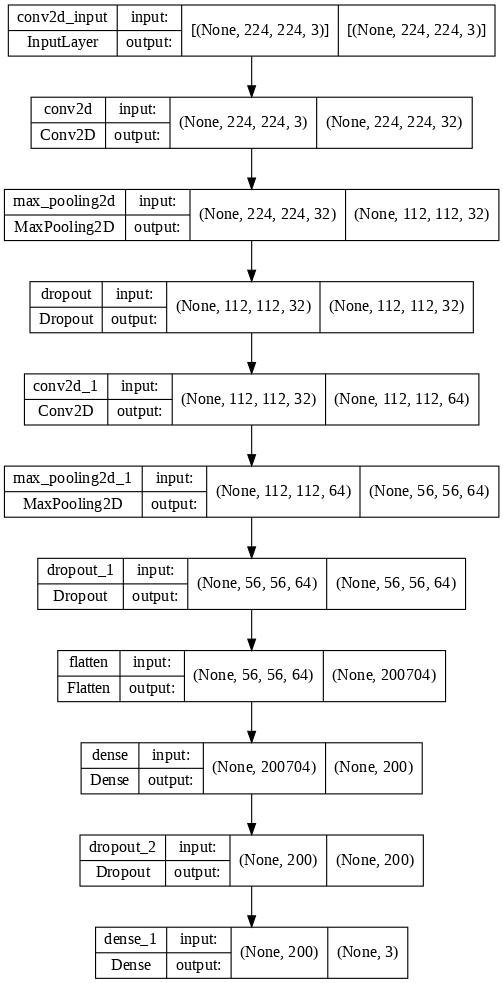

In [16]:
from tensorflow.keras.utils import plot_model
plot_model (model, show_shapes= True, expand_nested = True, dpi = 80 )

In [17]:
re = model.fit_generator(train_generator, epochs = 200, verbose =1, validation_data= validation_generator )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/200
7/7 [==============================] - 324s 37s/step - loss: 31.8768 - accuracy: 0.2816 - val_loss: 2.0368 - val_accuracy: 0.5688
Epoch 2/200
7/7 [==============================] - 14s 2s/step - loss: 2.4714 - accuracy: 0.2406 - val_loss: 1.0798 - val_accuracy: 0.2156
Epoch 3/200
7/7 [==============================] - 15s 2s/step - loss: 1.1306 - accuracy: 0.4572 - val_loss: 1.0951 - val_accuracy: 0.5459
Epoch 4/200
7/7 [==============================] - 14s 2s/step - loss: 1.0639 - accuracy: 0.6237 - val_loss: 1.0676 - val_accuracy: 0.6193
Epoch 5/200
7/7 [==============================] - 14s 2s/step - loss: 1.3616 - accuracy: 0.5690 - val_loss: 0.8756 - val_accuracy: 0.5780
Epoch 6/200
7/7 [==============================] - 14s 2s/step - loss: 1.0569 - accuracy: 0.5872 - val_loss: 1.0655 - val_accuracy: 0.6055
Epoch 7/200
7/7 [==============================] - 14s 2s/step - loss: 1.0105 - accuracy: 0.6283 - val_loss: 1.0733 - val_accuracy: 0.5826
Epoch 8/200
7/7 [=======

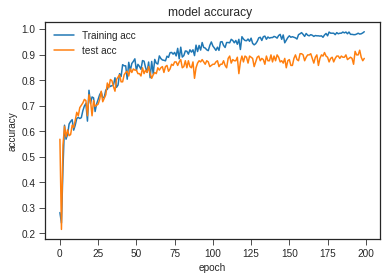

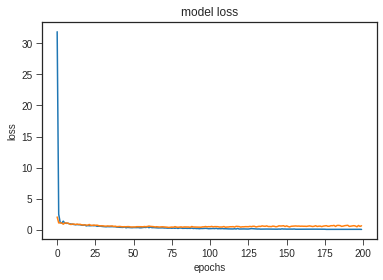

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-ticks")
plt.plot(re.history['accuracy'])
plt.plot(re.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc', 'test acc'], loc='upper left')
plt.show()


#summmerize history for loss
plt.plot(re.history['loss'])
plt.plot(re.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()


plt.figure()

In [19]:
print('Training results')
model.evaluate(test_generator)

Training results
3/3 [==============================] - 91s 45s/step - loss: 0.5551 - accuracy: 0.8759


[0.5551464557647705, 0.8759124279022217]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 
test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

#print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))

==============TEST RESULTS============
Found 274 images belonging to 3 classes.
3/3 [==============================] - 1s 211ms/step
              precision    recall  f1-score   support

      normal       0.96      0.93      0.94       156
 pappiledema       0.82      0.78      0.80        59
       psudo       0.78      0.88      0.83        59

    accuracy                           0.89       274
   macro avg       0.85      0.86      0.86       274
weighted avg       0.89      0.89      0.89       274



In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]


y_pred=yPredictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1) 
y_actual = y_true

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[145   7   4]
 [  2  46  11]
 [  4   3  52]]
              precision    recall  f1-score   support

      normal       0.96      0.93      0.94       156
 pappiledema       0.82      0.78      0.80        59
       psudo       0.78      0.88      0.83        59

    accuracy                           0.89       274
   macro avg       0.85      0.86      0.86       274
weighted avg       0.89      0.89      0.89       274



In [22]:
print('roc_auc_score = ' + str(roc_auc_score(y_pred, y_true)))

ValueError: ignored

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       156
           1       0.82      0.78      0.80        59
           2       0.78      0.88      0.83        59

    accuracy                           0.89       274
   macro avg       0.85      0.86      0.86       274
weighted avg       0.89      0.89      0.89       274



Text(0.5, 257.44, 'Predicted label')

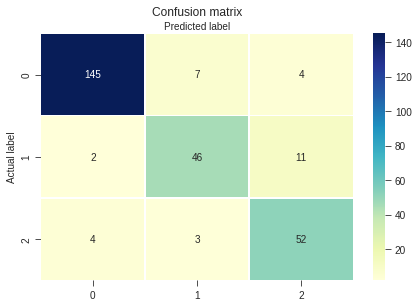

In [23]:
from sklearn.metrics import classification_report
import seaborn as sns
import sklearn
import pandas as pd
print(classification_report( true_classes, yPredictions))
cm_matrix = sklearn.metrics.confusion_matrix(true_classes, yPredictions)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True,linewidths=.5, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(true_classes, yPredictions)
auc = sklearn.metrics.roc_auc_score(true_classes, yPredictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot(fpr, tpr, color='orange', label='ROC curve from the proposed method')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


plt.show()

In [ ]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )